# (Udacity) Intro to Data Analysis

## 1. Data Analysis Process

### CSV

In [11]:
import unicodecsv

enrollments = []
f = open('enrollments.csv', 'rb')
reader = unicodecsv.DictReader(f)
# Dictreader : This means each row of csv is a dictionary

for row in reader:
    enrollments.append(row)

f.close()

enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [12]:
# Same with above but code is more concise

import unicodecsv

enrollments = []
with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
# Dictreader : This means each row of csv is a dictionary

    for row in reader:
        enrollments.append(row)

enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [13]:
# Same with above but even more concise

import unicodecsv

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
# Dictreader : This means each row of csv is a dictionary

enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [14]:
### Quiz
## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

daily_engagement[0], project_submissions[0]

({'acct': '0',
  'lessons_completed': '0.0',
  'num_courses_visited': '1.0',
  'projects_completed': '0.0',
  'total_minutes_visited': '11.6793745',
  'utc_date': '2015-01-09'},
 {'account_key': '256',
  'assigned_rating': 'UNGRADED',
  'completion_date': '2015-01-16',
  'creation_date': '2015-01-14',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'})

### Fixing Data Types

In [15]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [16]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [17]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

### Investigating Data & Wrangling Data

In [18]:
## Find the total number of rows and the number of unique students (account keys)in each table.

enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)

enrollment_unique_students = set()
for enrollment in enrollments:
    enrollment_unique_students.add(enrollment['account_key'])
    
enrollment_num_unique_students = len(enrollment_unique_students)
print(enrollment_num_unique_students)

# Why the difference btw these two numbers? It's because there are students who enroll, cancel and then re-enroll courses

1640
1302


In [19]:
engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)

engagement_unique_students = set()
for engagement_record in daily_engagement:
    engagement_unique_students.add(engagement_record['acct'])
    
engagement_num_unique_students = len(engagement_unique_students)

print(engagement_num_unique_students)

136240
1237


In [20]:
submission_num_rows = len(project_submissions)
print(submission_num_rows)

submission_unique_students = set()
for submission in project_submissions:
    submission_unique_students.add(submission['account_key'])
    
submission_num_unique_students = len(submission_unique_students)

print(submission_num_unique_students)

3642
743


In [21]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']

In [22]:
daily_engagement[0]['account_key']
# daily_engagement의 첫 번째 row 에서 'account_key'에 해당하는 value 존재하는지 확인!

'0'

In [23]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students:
        print(enrollment)
        break

{'days_to_cancel': 0, 'is_udacity': False, 'account_key': '1219', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_canceled': True}


In [24]:
num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students \
    and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
print(num_problem_students)

3


In [25]:
# 위에서 발견한 outlier 3개의 data를 print 한다

num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_students \
    and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print(enrollment)

{'days_to_cancel': 59, 'is_udacity': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'is_canceled': True}
{'days_to_cancel': 99, 'is_udacity': True, 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_canceled': True}
{'days_to_cancel': None, 'is_udacity': True, 'account_key': '1101', 'cancel_date': None, 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'is_canceled': False}


In [26]:
# Find out the number of test accounts 

udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

# test account가 6개라는 사실을 도출해낼 수 있다!

6

In [27]:
# Create function which only stores non-udacity test accounts

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [28]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


### Data Exploration Phase

In [29]:
# Key : account_key / values : enrollment dates

paid_students = dict()
for enrollment in non_udacity_enrollments:
    account_key = enrollment['account_key']
    enrollment_date = enrollment['join_date']
    if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7:
        paid_students[account_key] = enrollment_date

len(paid_students) 

995

In [30]:
# But there may be students who have canceled courses and re-enrolled in that course
# In that case, we may want to choose "the most recent enrollment date"

paid_students = dict()
for enrollment in non_udacity_enrollments:
    account_key = enrollment['account_key']
    enrollment_date = enrollment['join_date']
    if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7:
        paid_students[account_key] = enrollment_date
        
        if account_key not in paid_students or \
        enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
        # paid_students 명단에 없거나
        # paid_students 명단에 이미 있는 data의 join date보다 더 recent할 때 
        # 그 join_date로 갱신하기!


len(paid_students) 

995

#### Getting Data from First week

In [31]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [32]:
# enrollment, engagement, submission data에서 paid_student에 포함되는 student들만 
# 남기고 나머지는 삭제하기 위해 아래와 같은 함수 만듦!

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [33]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [34]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [35]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6920

#### Investigating(Exploring) first week data : Analyzing minutes spent in classroom during first week

In [36]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [37]:
# account별(학생별) total minutes spent in classroom in first week

total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [38]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print('Mean:', np.mean(list(total_minutes)))
print('Standard deviation:', np.std(list(total_minutes)))
print('Minimum:', np.min(list(total_minutes)))
print('Maximum:', np.max(list(total_minutes)))

# 그냥 np.mean(total_minutes) 로 print하면 dict_value에 대해서 mean 값 구할 수 없다는 error 메세지 뜸...
# 따라서 list로 바꿔서 구해야 mean, std 등의 값이 정상적으로 출력된다

Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


In [39]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
max_minutes # to check if the maximum total minutes is correct (10568.1008673)

3564.7332644989997

In [40]:
# print out the maximum time student's engagement records

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

{'total_minutes_visited': 850.519339666, 'account_key': '163', 'projects_completed': 0, 'lessons_completed': 4, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'has_visited': 1}
{'total_minutes_visited': 872.633923334, 'account_key': '163', 'projects_completed': 0, 'lessons_completed': 6, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'has_visited': 1}
{'total_minutes_visited': 777.018903666, 'account_key': '163', 'projects_completed': 0, 'lessons_completed': 6, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'has_visited': 1}
{'total_minutes_visited': 294.568774, 'account_key': '163', 'projects_completed': 0, 'lessons_completed': 2, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'has_visited': 1}
{'total_minutes_visited': 471.2139785, 'account_key': '163', 'projects_completed': 0, 'lessons_completed': 1, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited

#### Investigating(Exploring) first week data : Analyzing "lessons_completed" in First Week

In [41]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [42]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}

    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total

    return summed_data

In [43]:
import numpy as np

def describe_data(data):
    print('Mean:', np.mean(list(data)))
    print('Standard deviation:', np.std(list(data)))
    print('Minimum:', np.min(list(data)))
    print('Maximum:', np.max(list(data)))

In [44]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

describe_data(lessons_completed_by_account.values())

Mean: 1.63216080402
Standard deviation: 3.00140182563
Minimum: 0
Maximum: 36


#### Investigating(Exploring) first week data : Analyzing "num_courses_visited" in First Week

In [45]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

describe_data(days_visited_by_account.values())

Mean: 2.91256281407
Standard deviation: 2.22037005491
Minimum: 0
Maximum: 7


#### Splitting out students who passed the subway project ("project_submissions")

In [46]:
subway_project_lesson_keys = ['746169184', '3176718735']
# These two numbers are the project keys for the subway project

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and (rating=='PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

print(len(pass_subway_project))

647


In [47]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4528
2392


#### Comparing two groups of students (Ones who passed the subway project & others who didn't)

In [48]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [49]:
# comparison of num of minutes spent 

print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

non-passing students:
Mean: 145.399341866
Standard deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 391.481722325
Standard deviation: 439.653061726
Minimum: 0.0
Maximum: 3564.7332645


In [50]:
# comparison of num of lessons completed

print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

non-passing students:
Mean: 0.867816091954
Standard deviation: 2.54833703959
Minimum: 0
Maximum: 27
passing students:
Mean: 2.04327666151
Standard deviation: 3.1428602763
Minimum: 0
Maximum: 36


In [51]:
# num of days visited

print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())

non-passing students:
Mean: 1.95114942529
Standard deviation: 1.88929952676
Minimum: 0
Maximum: 7
passing students:
Mean: 3.42967542504
Standard deviation: 2.21298340866
Minimum: 0
Maximum: 7


### Visualization

In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(array([ 290.,   32.,   13.,    5.,    1.,    5.,    2.]),
 array([    0.        ,   252.64610705,   505.29221409,   757.93832114,
         1010.58442819,  1263.23053524,  1515.87664228,  1768.52274933]),
 <a list of 7 Patch objects>)

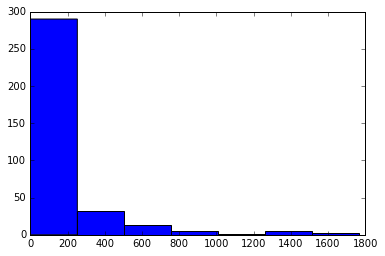

In [53]:
plt.hist(list(non_passing_minutes.values()), bins=7)

(array([ 457.,  141.,   35.,    8.,    3.,    2.,    1.]),
 array([    0.        ,   509.24760921,  1018.49521843,  1527.74282764,
         2036.99043686,  2546.23804607,  3055.48565528,  3564.7332645 ]),
 <a list of 7 Patch objects>)

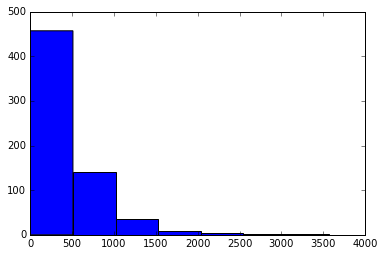

In [54]:
plt.hist(list(passing_minutes.values()), bins=7)

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

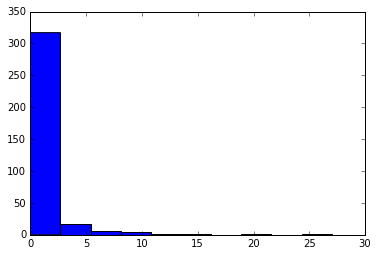

In [55]:
plt.hist(list(non_passing_lessons.values()))

(array([ 518.,   95.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

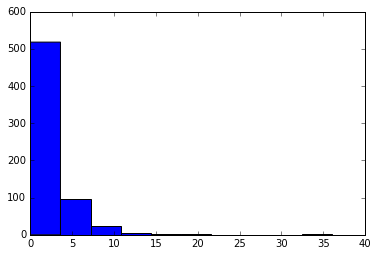

In [56]:
plt.hist(list(passing_lessons.values()))

(array([ 89.,  93.,  59.,  42.,  16.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

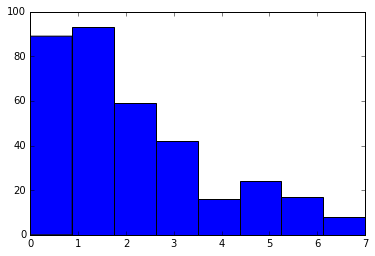

In [57]:
plt.hist(list(non_passing_visits.values()),bins=8)

(array([ 76.,  83.,  81.,  96.,  80.,  86.,  79.,  66.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

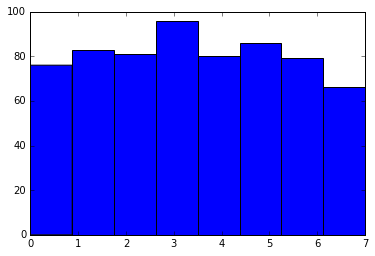

In [58]:
plt.hist(list(passing_visits.values()),bins=8)

### Drawing Conclusions Phase

#### "Correlation doesn't always imply causation"

#### Making Predictions

### Communication Phase

#### polishing prior visualizations

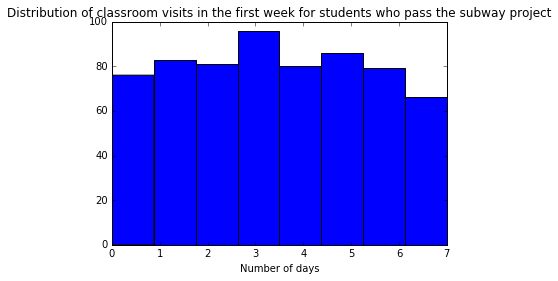

In [62]:
# import seaborn as sns (ImportError : 원인 아직 모르겠음;;;;)

plt.hist(list(passing_visits.values()), bins=8)
# visit_days in range of 0~7, so eight bins

plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week' + ' '+ \
'for students who pass the subway project')

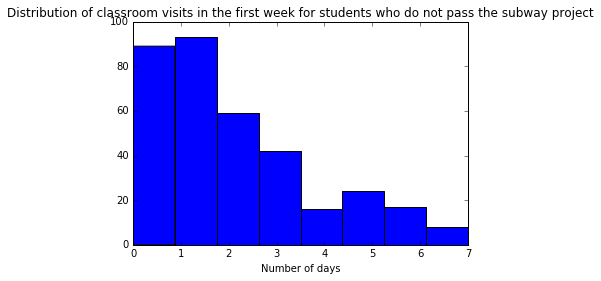

In [63]:
plt.hist(list(non_passing_visits.values()), bins=8)

plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week' + ' '+ \
'for students who do not pass the subway project')

#### Data Analysis and Related Terms